In [30]:
import pandas as pd

In [31]:
df = pd.read_excel('../Datos/DB_Comentarios_Clean.xlsx')

In [32]:
df.head()

,fecha,calificacion,comentario,comentarios_limpios_spacy
0,01 ene. 2024,1,"Producto con terminados horribles, manchado, p...",terminado horrible manchado pintura corrido di...
1,01 may. 2023,1,El producto es un poco ordinario y tuve que ma...,ordinario tener mandar él reparar rapido mes c...
2,02 oct. 2024,1,Talla incorrecta.,tallar incorrecto
3,02 sep. 2019,1,Definitivamente no cuadra en el pie.,definitivamente cuadrar pie
4,03 ene. 2025,1,"No son nada cómodos, la plantilla se corre y l...",comodo plantilla correr suela delgado


In [33]:
# eliminar valores nulos
df = df.dropna()

In [34]:
df.isnull().sum()

fecha                        0
calificacion                 0
comentario                   0
comentarios_limpios_spacy    0
dtype: int64

#

In [35]:
# mapeo de estrellas a sentimiento, (1y2 = negativo, 3 = neutro, 4y5 = positivo)

# Definir el mapeo estrellas → sentimiento (texto)
rating_to_label = {
    1: "negativo",
    2: "negativo",
    3: "negativo",
    4: "positivo",
    5: "positivo",
}

# Aplicar el mapeo
df["sentimiento"] = df["calificacion"].map(rating_to_label)

# 4. Codificar la etiqueta a valor numérico
#label_to_int = {"negativo": 0, "neutro": 1, "positivo": 2}
label_to_int = {"negativo": 0, "positivo": 1}
df["sentimiento_id"] = df["sentimiento"].map(label_to_int)

# 5. Revisar la distribución resultante
print(df["sentimiento"].value_counts())

sentimiento
positivo    4073
negativo     400
Name: count, dtype: int64


In [36]:
df.head()

,fecha,calificacion,comentario,comentarios_limpios_spacy,sentimiento,sentimiento_id
0,01 ene. 2024,1,"Producto con terminados horribles, manchado, p...",terminado horrible manchado pintura corrido di...,negativo,0
1,01 may. 2023,1,El producto es un poco ordinario y tuve que ma...,ordinario tener mandar él reparar rapido mes c...,negativo,0
2,02 oct. 2024,1,Talla incorrecta.,tallar incorrecto,negativo,0
3,02 sep. 2019,1,Definitivamente no cuadra en el pie.,definitivamente cuadrar pie,negativo,0
4,03 ene. 2025,1,"No son nada cómodos, la plantilla se corre y l...",comodo plantilla correr suela delgado,negativo,0


In [37]:
MAX_NUM_WORDS = 10000        # Tamaño del vocabulario (palabras más frecuentes)
MAX_SEQUENCE_LENGTH = 50     # Longitud fija de cada comentario (en tokens)
EMBEDDING_DIM = 100          # Tamaño del embedding vector (100 es estándar)


In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Inicializar el tokenizador
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df["comentarios_limpios_spacy"])

# Convertir texto a secuencia de enteros
sequences = tokenizer.texts_to_sequences(df["comentarios_limpios_spacy"])

# Padding: hacer que todas las secuencias tengan la misma longitud
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")


In [39]:
tokenizer.word_index

{'<OOV>': 1,
 'excelente': 2,
 'comoda': 3,
 'talla': 4,
 'comodo': 5,
 'bonito': 6,
 'super': 7,
 'quedar': 8,
 'material': 9,
 'esperar': 10,
 'lindo': 11,
 'suave': 12,
 'encantar': 13,
 'perfecto': 14,
 'precio': 15,
 'recomendado': 16,
 'pie': 17,
 'suela': 18,
 'recomeir': 19,
 'foto': 20,
 'gustar': 21,
 'ver': 22,
 'pedir': 23,
 'justo': 24,
 'pedi': 25,
 'gracias': 26,
 'pequena': 27,
 'comprar': 28,
 'él': 29,
 'quedo': 30,
 'pantufla': 31,
 'diseno': 32,
 'zapato': 33,
 'hermosa': 34,
 'regalo': 35,
 'cumplir': 36,
 'color': 37,
 'gusto': 38,
 'compra': 39,
 'gracia': 40,
 'bonita': 41,
 'parecer': 42,
 'pequeno': 43,
 'medida': 44,
 'satisfecho': 45,
 'hermoso': 46,
 'sentir': 47,
 'casa': 48,
 'caminar': 49,
 'genial': 50,
 'rapido': 51,
 'esperado': 52,
 'babucha': 53,
 'imagen': 54,
 'playa': 55,
 'expectativa': 56,
 'numero': 57,
 'compre': 58,
 'frio': 59,
 'comodas': 60,
 'exelente': 61,
 'hijo': 62,
 'tallar': 63,
 'venir': 64,
 'terminado': 65,
 'pequén': 66,
 'unic

In [40]:
tokenizer.texts_to_sequences(["MUY LINDAS LAS BABUCHA."])

[[1, 918, 1, 53]]

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split

y = df["sentimiento_id"].values  # Asegúrate que está codificada como 0, 1, 2

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [42]:
df["sentimiento_id"].value_counts()

sentimiento_id
1    4073
0     400
Name: count, dtype: int64

In [43]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(895, 50)
(895,)
(3578, 50)
(3578,)


In [44]:
tokenizer.word_index

{'<OOV>': 1,
 'excelente': 2,
 'comoda': 3,
 'talla': 4,
 'comodo': 5,
 'bonito': 6,
 'super': 7,
 'quedar': 8,
 'material': 9,
 'esperar': 10,
 'lindo': 11,
 'suave': 12,
 'encantar': 13,
 'perfecto': 14,
 'precio': 15,
 'recomendado': 16,
 'pie': 17,
 'suela': 18,
 'recomeir': 19,
 'foto': 20,
 'gustar': 21,
 'ver': 22,
 'pedir': 23,
 'justo': 24,
 'pedi': 25,
 'gracias': 26,
 'pequena': 27,
 'comprar': 28,
 'él': 29,
 'quedo': 30,
 'pantufla': 31,
 'diseno': 32,
 'zapato': 33,
 'hermosa': 34,
 'regalo': 35,
 'cumplir': 36,
 'color': 37,
 'gusto': 38,
 'compra': 39,
 'gracia': 40,
 'bonita': 41,
 'parecer': 42,
 'pequeno': 43,
 'medida': 44,
 'satisfecho': 45,
 'hermoso': 46,
 'sentir': 47,
 'casa': 48,
 'caminar': 49,
 'genial': 50,
 'rapido': 51,
 'esperado': 52,
 'babucha': 53,
 'imagen': 54,
 'playa': 55,
 'expectativa': 56,
 'numero': 57,
 'compre': 58,
 'frio': 59,
 'comodas': 60,
 'exelente': 61,
 'hijo': 62,
 'tallar': 63,
 'venir': 64,
 'terminado': 65,
 'pequén': 66,
 'unic

### Modelado

In [15]:
# 1. Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam  # o puedes usar SGD si quieres

In [45]:
# 2. Hiperparámetros
MAX_NUM_WORDS = 10000        # Tamaño del vocabulario
MAX_SEQUENCE_LENGTH = 50     # Longitud máxima de secuencias
EMBEDDING_DIM = 100          # Dimensión del vector de embedding
NUM_CLASSES = 2             # Salida: negativo, neutro, positivo

In [46]:
# 3. Definir el modelo CNN
model = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='sigmoid')  # Salida multiclase
])


In [47]:
# 4. Compilar el modelo
model.compile(
    optimizer=Adam(),  # puedes cambiar a SGD() si lo deseas
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:

# Resumen del modelo
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 100)           1000000   
                                                                 
 conv1d_5 (Conv1D)           (None, 46, 128)           64128     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                      

In [49]:
# 5. Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=23,
    validation_data=(X_test, y_test)
)

Epoch 1/25
156/156 [==============================] - 2s 9ms/step - loss: 0.2968 - accuracy: 0.9092 - val_loss: 0.2230 - val_accuracy: 0.9106
Epoch 2/25
156/156 [==============================] - 1s 8ms/step - loss: 0.1706 - accuracy: 0.9343 - val_loss: 0.2325 - val_accuracy: 0.8994
Epoch 3/25
156/156 [==============================] - 1s 8ms/step - loss: 0.0936 - accuracy: 0.9693 - val_loss: 0.2946 - val_accuracy: 0.9028
Epoch 4/25
156/156 [==============================] - 1s 9ms/step - loss: 0.0621 - accuracy: 0.9796 - val_loss: 0.3423 - val_accuracy: 0.8972
Epoch 5/25
156/156 [==============================] - 1s 9ms/step - loss: 0.0459 - accuracy: 0.9877 - val_loss: 0.3895 - val_accuracy: 0.9039
Epoch 6/25
156/156 [==============================] - 1s 8ms/step - loss: 0.0376 - accuracy: 0.9894 - val_loss: 0.4176 - val_accuracy: 0.9039
Epoch 7/25
156/156 [==============================] - 1s 8ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.4400 - val_accuracy: 0.9061
Epoch 

In [52]:
# 6. Evaluar desempeño
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f} - Accuracy: {accuracy:.4f}")

28/28 [==============================] - 0s 2ms/step - loss: 0.9833 - accuracy: 0.9017
Loss: 0.9833 - Accuracy: 0.9017


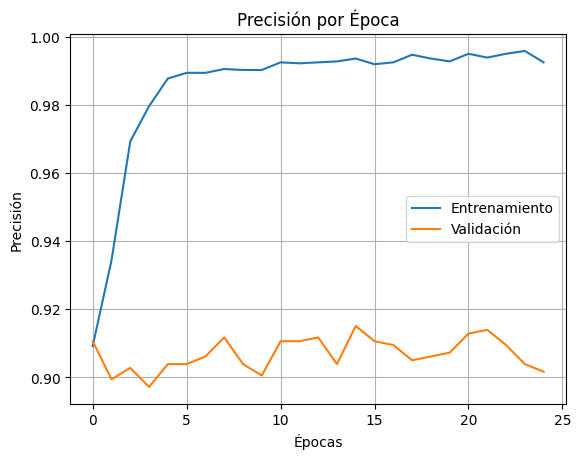

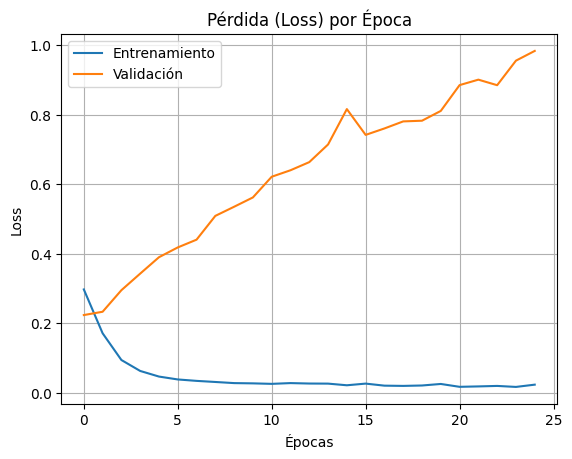

In [53]:
# ACCURACY
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# LOSS
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (Loss) por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### Variacion 2

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight

In [55]:
# 1. Hiperparámetros
MAX_NUM_WORDS = 10000        # Tamaño del vocabulario
MAX_SEQUENCE_LENGTH = 50     # Longitud máxima de secuencias
EMBEDDING_DIM = 100          # Tamaño del embedding
NUM_CLASSES = 2              # Negativo, Neutro, Positivo

# 2. Calcular pesos de clase (si hay desbalance)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# 3. Callback de early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

# 4. Definición del modelo
model = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Conv1D(filters=64, kernel_size=8, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='sigmoid')  # Salida binaria
])

# 5. Compilación
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Entrenamiento
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=28,
    validation_data=(X_test, y_test),
    class_weight=class_weights,
    callbacks=[early_stop]
)

# 7. Evaluación final
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Evaluación final → Loss: {loss:.4f} - Accuracy: {accuracy:.4f}")

Epoch 1/50
128/128 [==============================] - 2s 9ms/step - loss: 0.9111 - accuracy: 0.6434 - val_loss: 0.7055 - val_accuracy: 0.7944
Epoch 2/50
128/128 [==============================] - 1s 9ms/step - loss: 0.5787 - accuracy: 0.7764 - val_loss: 0.4243 - val_accuracy: 0.8492
Epoch 3/50
128/128 [==============================] - 1s 9ms/step - loss: 0.3753 - accuracy: 0.8874 - val_loss: 0.3928 - val_accuracy: 0.8860
Epoch 4/50
128/128 [==============================] - 1s 9ms/step - loss: 0.2712 - accuracy: 0.9441 - val_loss: 0.4695 - val_accuracy: 0.8480
Epoch 5/50
128/128 [==============================] - 1s 8ms/step - loss: 0.2173 - accuracy: 0.9505 - val_loss: 0.3916 - val_accuracy: 0.8849
Epoch 6/50
128/128 [==============================] - 1s 8ms/step - loss: 0.1932 - accuracy: 0.9603 - val_loss: 0.3491 - val_accuracy: 0.8983
Epoch 7/50
128/128 [==============================] - 1s 8ms/step - loss: 0.1630 - accuracy: 0.9642 - val_loss: 0.3516 - val_accuracy: 0.9050
Epoch 

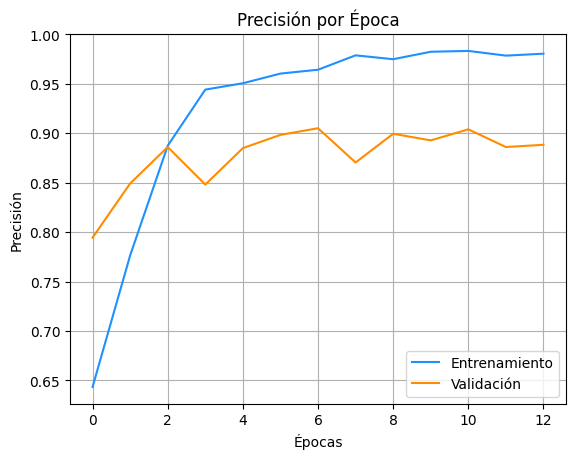

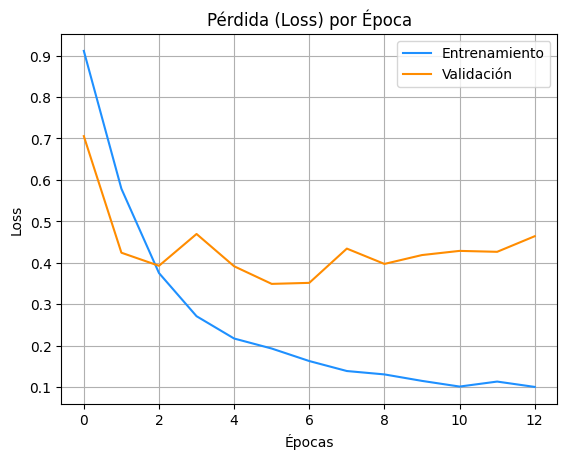

In [56]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Entrenamiento', color='dodgerblue')
plt.plot(history.history['val_accuracy'], label='Validación', color='darkorange')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Entrenamiento', color='dodgerblue')
plt.plot(history.history['val_loss'], label='Validación', color='darkorange')
plt.title('Pérdida (Loss) por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

28/28 [==============================] - 0s 2ms/step
Accuracy: 0.8983

Reporte de clasificación:
              precision    recall  f1-score   support

    Negativo       0.44      0.49      0.46        80
    Positivo       0.95      0.94      0.94       815

    accuracy                           0.90       895
   macro avg       0.69      0.71      0.70       895
weighted avg       0.90      0.90      0.90       895



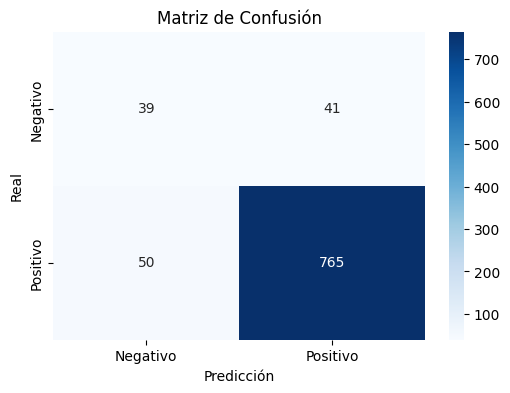

In [58]:
# Obtener predicciones del modelo
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)  # Elegir la clase con mayor probabilidad

# Nombres de clases (ajústalos si tienes etiquetas personalizadas)
target_names = ['Negativo', 'Positivo']

# accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización de la matriz
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
#plt.tight_layout()
plt.show()


In [59]:
class_weights

{0: 5.590625, 1: 0.549109883364027}

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)

### Variacion oversampling

In [60]:
# ────────────────────────────────────────────────
# 1. Librerías necesarias
import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ────────────────────────────────────────────────
# 2. Hiperparámetros
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 100
NUM_CLASSES = 2  # Negativo, Positivo
NUM_EPOCHS = 25

In [61]:
# ────────────────────────────────────────────────
# 3. Oversampling SOLO al set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("✔ Distribución original:", Counter(y_train))
print("✔ Distribución balanceada:", Counter(y_train_resampled))


✔ Distribución original: Counter({1: 3258, 0: 320})
✔ Distribución balanceada: Counter({1: 3258, 0: 3258})


In [62]:
# ────────────────────────────────────────────────
# 4. Callback de EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# ────────────────────────────────────────────────
# 5. Modelo CNN
model = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='sigmoid')  # Salida binaria
])

# ────────────────────────────────────────────────
# 6. Compilación
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [63]:
# ────────────────────────────────────────────────
# 7. Entrenamiento
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=NUM_EPOCHS,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/25
204/204 [==============================] - 2s 9ms/step - loss: 0.5208 - accuracy: 0.7606 - val_loss: 0.3186 - val_accuracy: 0.9017
Epoch 2/25
204/204 [==============================] - 2s 8ms/step - loss: 0.2005 - accuracy: 0.9440 - val_loss: 0.3637 - val_accuracy: 0.9106
Epoch 3/25
204/204 [==============================] - 2s 8ms/step - loss: 0.1184 - accuracy: 0.9699 - val_loss: 0.4554 - val_accuracy: 0.9006
Epoch 4/25
204/204 [==============================] - 2s 8ms/step - loss: 0.0906 - accuracy: 0.9776 - val_loss: 0.5053 - val_accuracy: 0.9073
Epoch 5/25
204/204 [==============================] - 2s 8ms/step - loss: 0.0803 - accuracy: 0.9814 - val_loss: 0.5609 - val_accuracy: 0.9028
Epoch 6/25
204/204 [==============================] - 2s 9ms/step - loss: 0.0734 - accuracy: 0.9820 - val_loss: 0.6038 - val_accuracy: 0.9039


28/28 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.9017

📊 Evaluación final ➜ Loss: 0.3186 - Accuracy: 0.9017
28/28 [==============================] - 0s 2ms/step

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        80
           1       0.95      0.94      0.95       815

    accuracy                           0.90       895
   macro avg       0.71      0.74      0.72       895
weighted avg       0.91      0.90      0.91       895


🧩 Matriz de Confusión:
[[ 44  36]
 [ 52 763]]


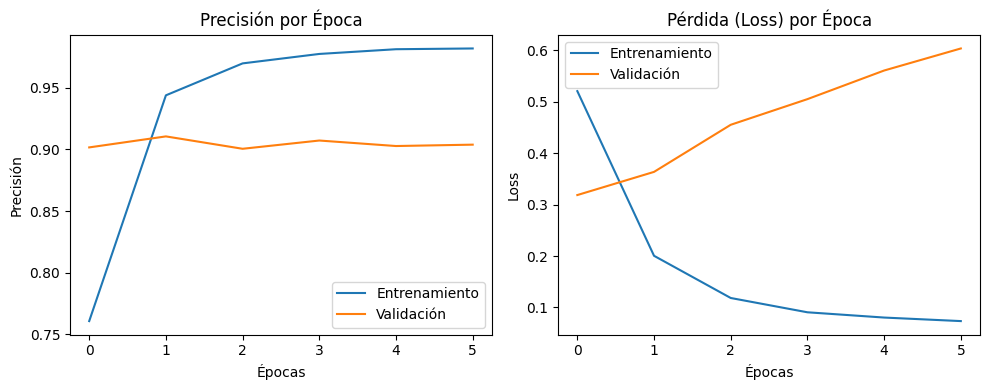

In [64]:
# ────────────────────────────────────────────────
# 8. Evaluación
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n📊 Evaluación final ➜ Loss: {loss:.4f} - Accuracy: {accuracy:.4f}")

# ────────────────────────────────────────────────
# 9. Reporte y Matriz de Confusión
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\n📋 Reporte de clasificación:")
print(classification_report(y_test, y_pred_classes, digits=2))

print("\n🧩 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_classes))

# ────────────────────────────────────────────────
# 10. Gráficas de entrenamiento
plt.figure(figsize=(10, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (Loss) por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Aplicar SMOTE (requiere 2D arrays y etiquetas codificadas como enteros)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [67]:
# visualizar las nuevas clases.
Counter(y_train_resampled)

Counter({1: 3258, 0: 3258})

Epoch 1/25
204/204 [==============================] - 2s 9ms/step - loss: 0.6546 - accuracy: 0.6535 - val_loss: 0.6474 - val_accuracy: 0.6905
Epoch 2/25
204/204 [==============================] - 2s 8ms/step - loss: 0.4743 - accuracy: 0.8036 - val_loss: 0.4544 - val_accuracy: 0.8313
Epoch 3/25
204/204 [==============================] - 2s 8ms/step - loss: 0.3537 - accuracy: 0.8654 - val_loss: 0.5490 - val_accuracy: 0.8168
Epoch 4/25
204/204 [==============================] - 2s 8ms/step - loss: 0.2932 - accuracy: 0.8941 - val_loss: 0.5130 - val_accuracy: 0.8291
Epoch 5/25
204/204 [==============================] - 2s 8ms/step - loss: 0.2394 - accuracy: 0.9174 - val_loss: 0.7128 - val_accuracy: 0.8045
Epoch 6/25
204/204 [==============================] - 2s 8ms/step - loss: 0.2058 - accuracy: 0.9259 - val_loss: 0.6466 - val_accuracy: 0.8268
Epoch 7/25
204/204 [==============================] - 2s 8ms/step - loss: 0.1855 - accuracy: 0.9374 - val_loss: 0.7411 - val_accuracy: 0.8179
Epoch 

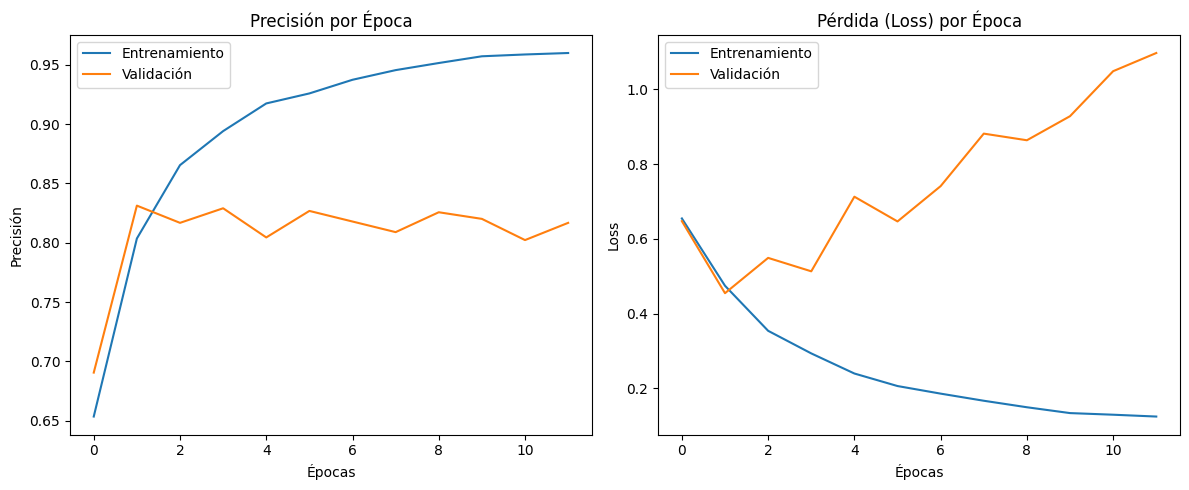

In [68]:
# Calcular pesos de clase (opcional si ya equilibraste con SMOTE)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights = dict(enumerate(class_weights))

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modelo CNN
model = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='sigmoid')  # Salida binaria
])
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# Evaluar
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Evaluación final ➜ Loss: {loss:.4f} - Accuracy: {accuracy:.4f}")

# Clasificación y matriz
y_pred = model.predict(X_test).argmax(axis=1)
print("\n📊 Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\n🧮 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Gráficas
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (Loss) por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Variacion undersampling esemble.

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:


# ======================
# 1. Cargar y preparar datos
# ======================
df = pd.read_excel("../Datos/DB_Comentarios_Clean.xlsx")
df = df.dropna(subset=["comentario", "calificacion"])

# Mapeo binario
rating_to_label = {1: "negativo", 2: "negativo", 3: "negativo", 4: "positivo", 5: "positivo"}
label_to_int = {"negativo": 0, "positivo": 1}
int_to_label = {0: "negativo", 1: "positivo"}
df["sentimiento"] = df["calificacion"].map(rating_to_label)
df["sentimiento_id"] = df["sentimiento"].map(label_to_int)

# División general train/test
X_train_texts, X_test_texts, y_train, y_test = train_test_split(
    df["comentario"], df["sentimiento_id"], test_size=0.2, stratify=df["sentimiento_id"], random_state=42
)

# ======================
# 2. Tokenización
# ======================
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 100
NUM_EPOCHS = 10

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_texts)

# Convertir texto a secuencias
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")

# ======================
# 3. Definir función de modelo base
# ======================
def build_model():
    model = Sequential([
        Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
        Conv1D(filters=64, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model




In [ ]:
# ======================
# 4. Ensemble con undersampling balanceado
# ======================
df_neg = df[df["sentimiento_id"] == 0]
df_pos = df[df["sentimiento_id"] == 1]

N = 100
modelos = []

for i in range(N):
    df_pos_sample = resample(df_pos, replace=False, n_samples=len(df_neg), random_state=42 + i)
    df_bal = pd.concat([df_pos_sample, df_neg]).sample(frac=1, random_state=42 + i)

    X_bal_seq = tokenizer.texts_to_sequences(df_bal["comentario"])
    X_bal_pad = pad_sequences(X_bal_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")
    y_bal = df_bal["sentimiento_id"].values

    model_i = build_model()
    model_i.fit(X_bal_pad, y_bal, epochs=NUM_EPOCHS, batch_size=32, verbose=0)
    modelos.append(model_i)

print(f"\nEntrenamiento finalizado: {N} modelos entrenados")




✅ Entrenamiento finalizado: 100 modelos entrenados



📊 Accuracy: 0.8506

📋 Reporte de clasificación:
              precision    recall  f1-score   support

    Negativo       0.36      1.00      0.53        81
    Positivo       1.00      0.84      0.91       863

    accuracy                           0.85       944
   macro avg       0.68      0.92      0.72       944
weighted avg       0.95      0.85      0.88       944


🧩 Matriz de Confusión:


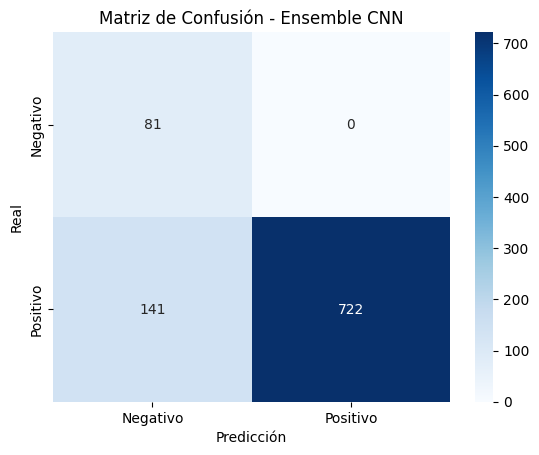

In [ ]:
# ======================
# 5. Predicción por votación
# ======================
preds = np.array([model.predict(X_test_pad, verbose=0).flatten() for model in modelos])
promedio_preds = np.mean(preds, axis=0)
y_pred_binario = (promedio_preds > 0.5).astype(int)

# ======================
# 6. Evaluación
# ======================
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_binario):.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_binario, target_names=["Negativo", "Positivo"], digits=2))

print("\nMatriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred_binario)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negativo", "Positivo"],
            yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Ensemble CNN")
plt.show()